In [120]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimização
import optuna

In [121]:
df_obesidade = pd.read_csv('./datasets/dataset_obesidade.csv')
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [122]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [123]:
#EDA

# Convert variables to int64

df_obesidade[['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']] = df_obesidade[['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']].astype(int)

In [124]:
# Detect if there is null value

df_obesidade.isnull().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

<Axes: xlabel='Obeso'>

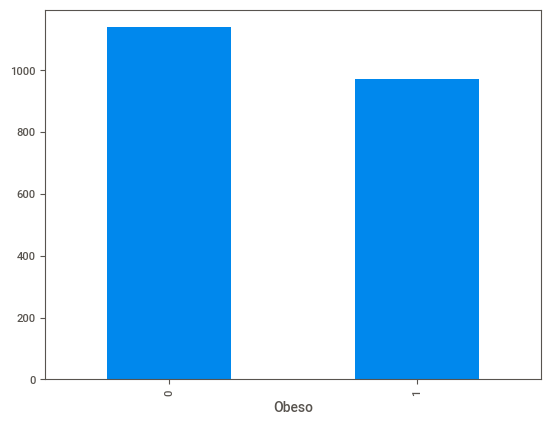

In [125]:
# Distribuição da variável target 'obeso'

df_obesidade['Obeso'].value_counts().plot(kind='bar')

In [126]:
# Analise Univariada - Idade

px.histogram(df_obesidade, x='Idade')




In [127]:
px.box(df_obesidade, y='Idade')

In [128]:
# Analise Univariada - Gênero

px.bar(df_obesidade.value_counts('Genero_Masculino')/len(df_obesidade)*100)

In [129]:
# Análise Univariada - Histórico de Obesidade na Família

px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso')/len(df_obesidade)*100)


In [130]:
# Análise Univariada - Histórico de Nível de Exercício

px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica')/len(df_obesidade)*100)


In [131]:
# Análise Univariada - Histórico de Nível de Exercício

px.bar(df_obesidade.value_counts('Nivel_Uso_Tela')/len(df_obesidade)*100)

In [132]:
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]

labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_obesidade['Faixa_Etaria_String'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=labels, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest=True)

In [133]:
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1


In [134]:
# Teste de Chi2 para verificar correlação

# Criar tabela de contigiência para 'faixa_etaria' e 'obeso'ArithmeticError

crosstab_faixa_etaria_obeso = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])
crosstab_faixa_etaria_obeso.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [135]:
# Teste de Chi2 de Pearson

print(crosstab_faixa_etaria_obeso.test_nominal_association())
# df = grau de liberdade
# pvalue < 0,5 -> rejeita a hipótese nula -> variáveis não são independentes
# statistc

df          5
pvalue      0.0
statistic   170.1116865347508


In [136]:
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1


In [137]:
# Automatizando com Sweetviz
df_obesidade.drop(['Idade'], axis=1, inplace=True)

report = sv.analyze(df_obesidade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


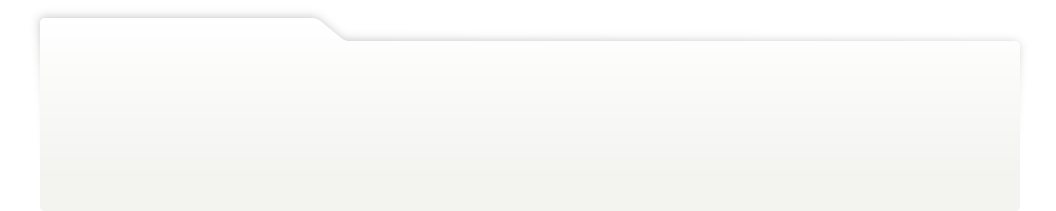
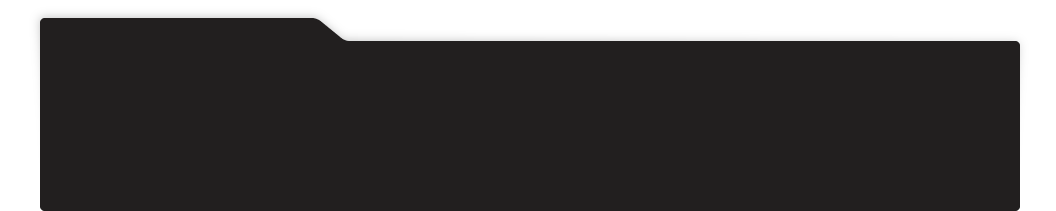
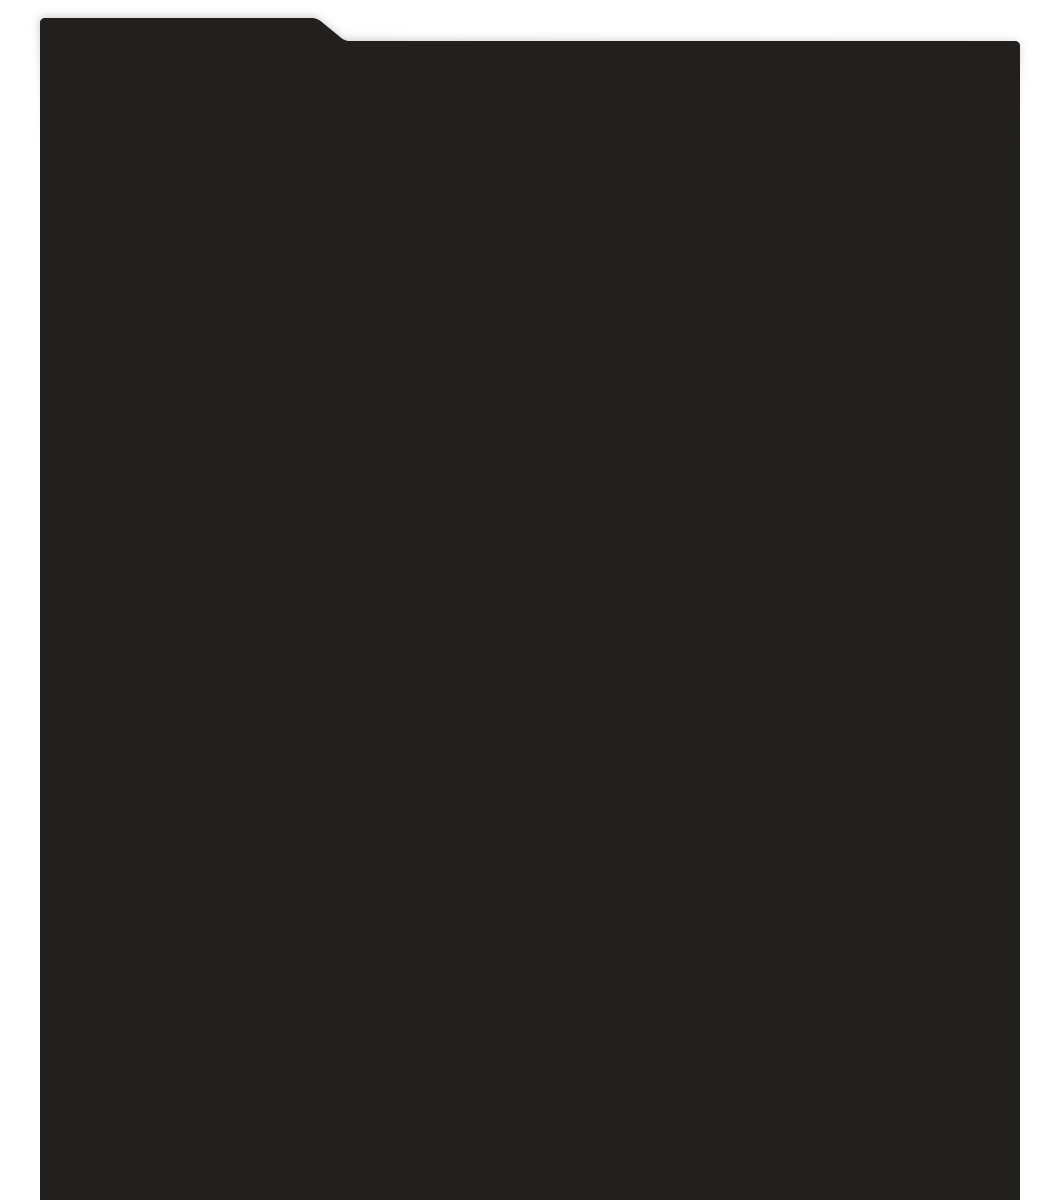
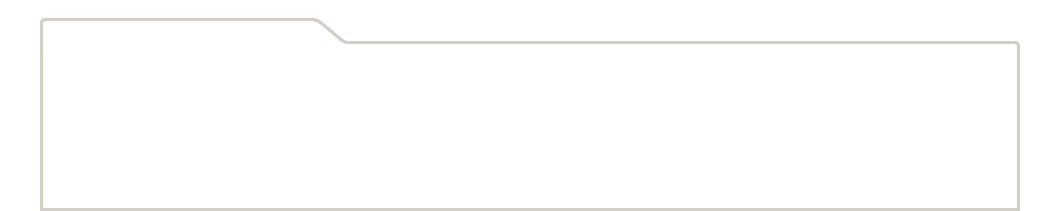
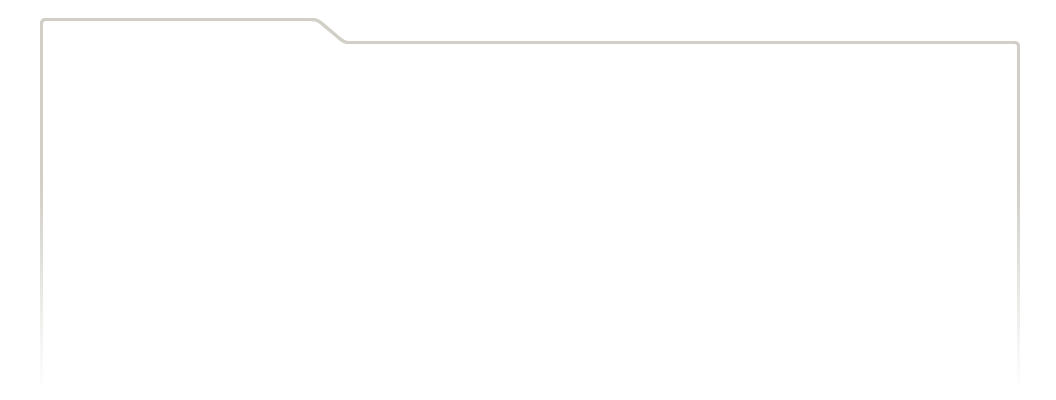
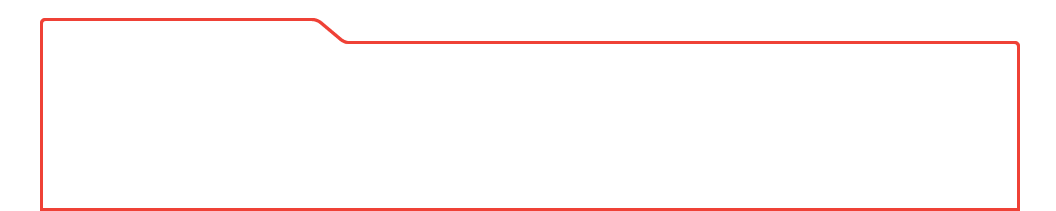
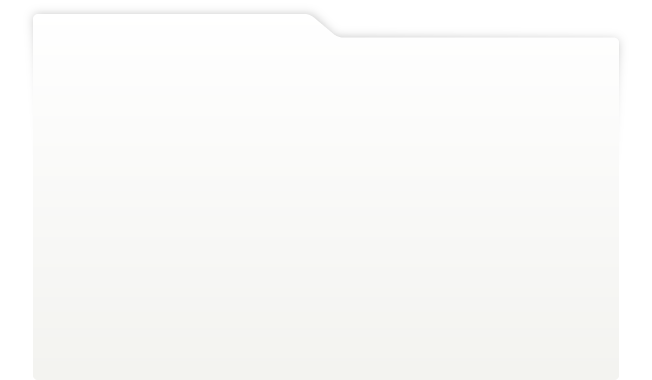
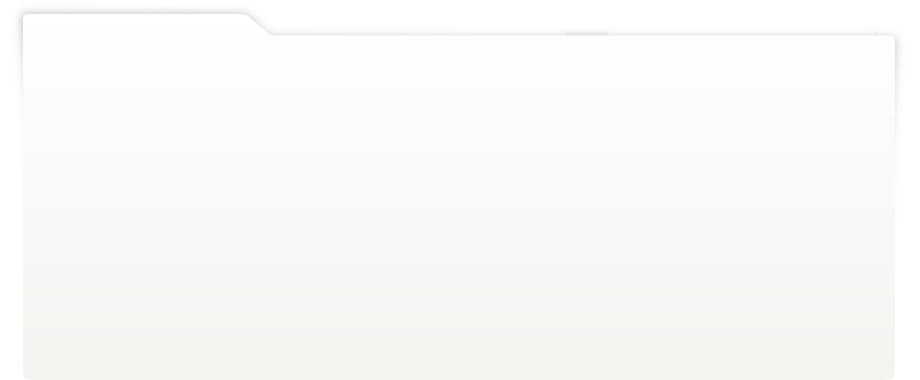
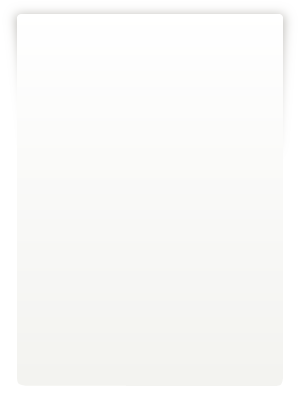
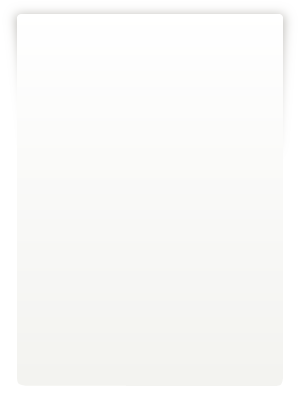
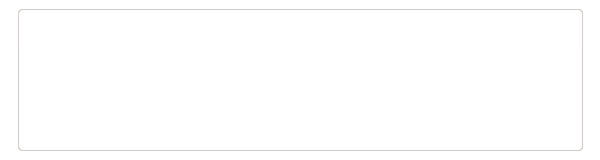
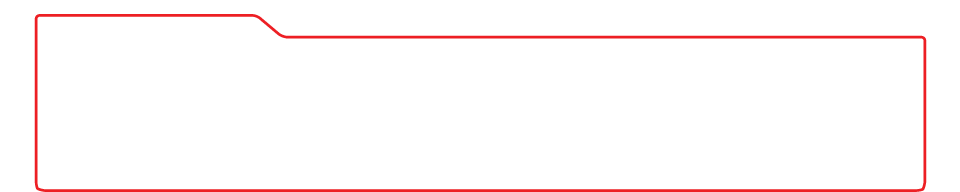
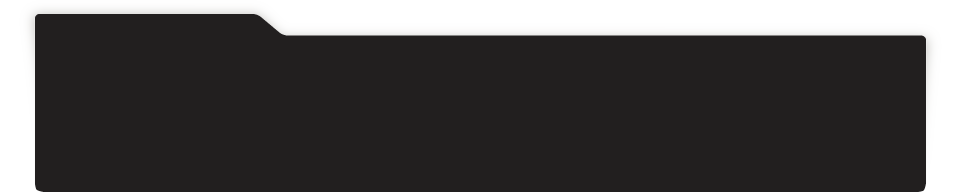
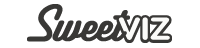
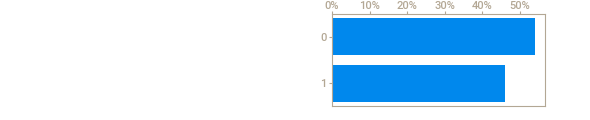
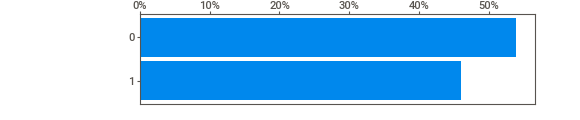
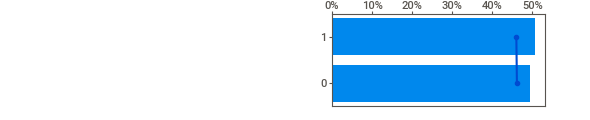
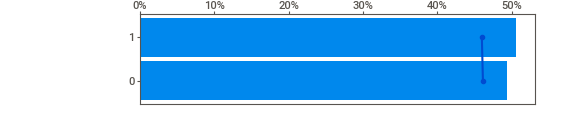
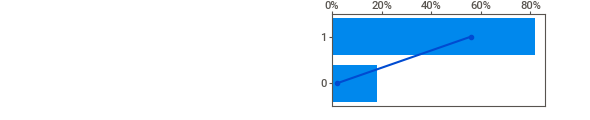
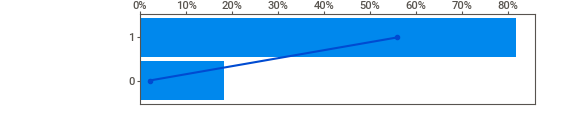
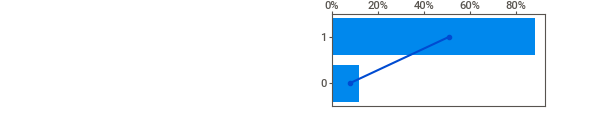
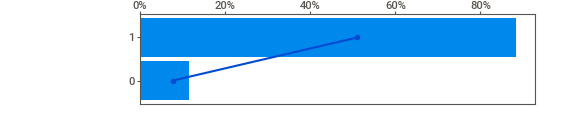
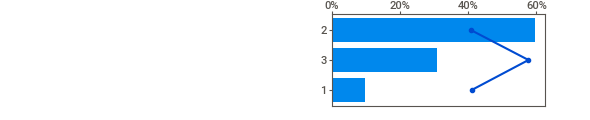
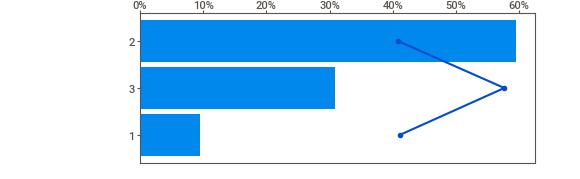
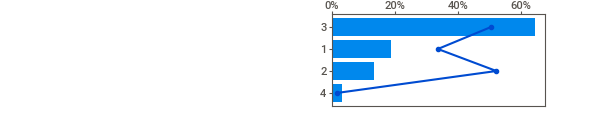
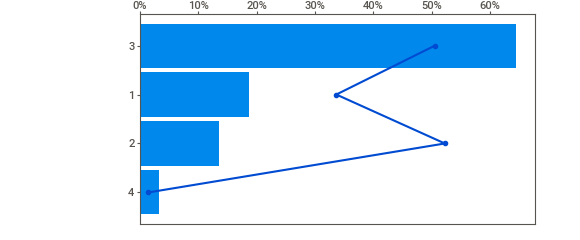
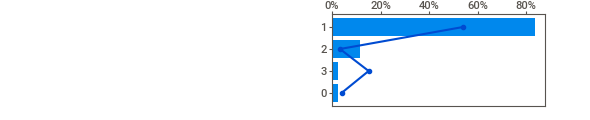
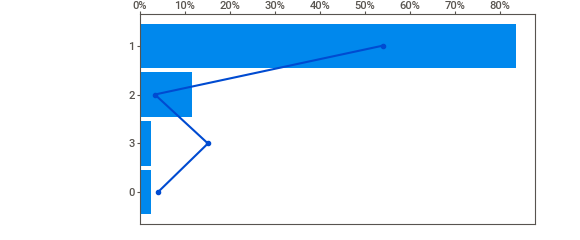
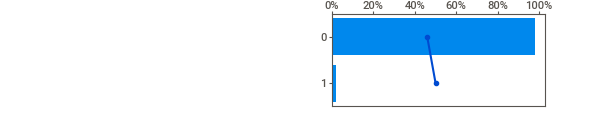
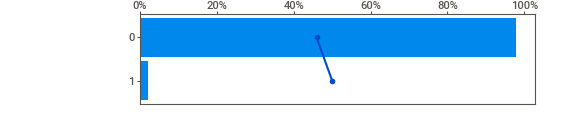
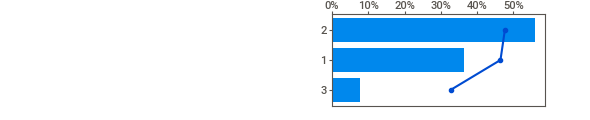
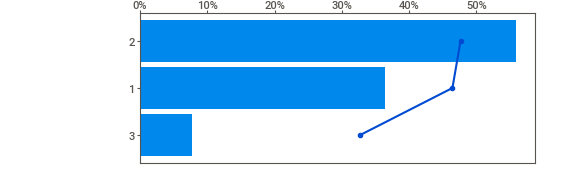
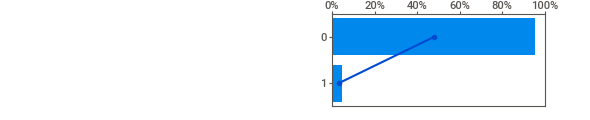
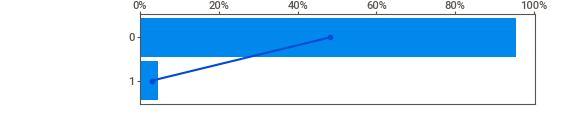
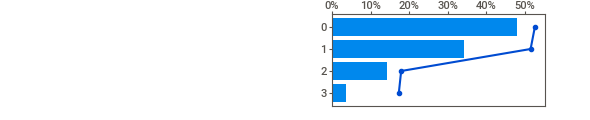
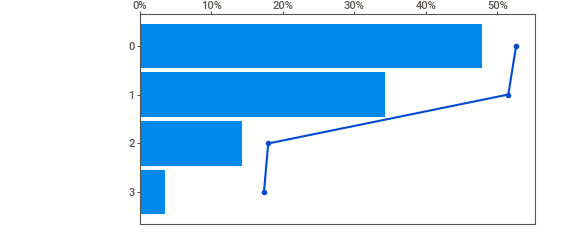
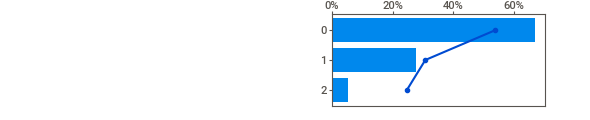
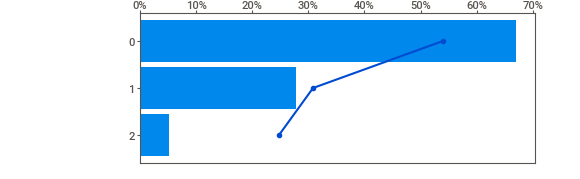
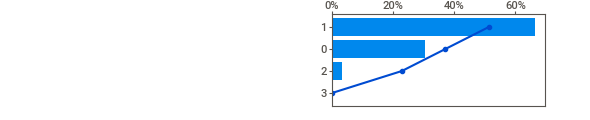
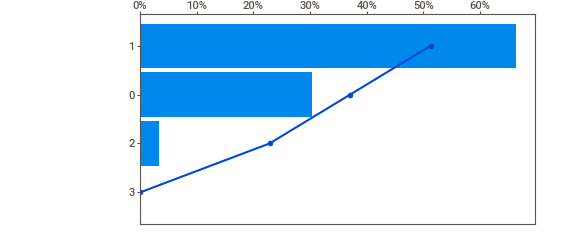
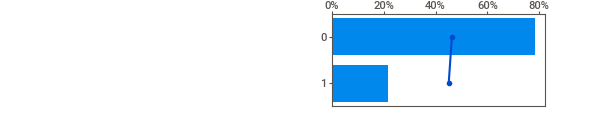
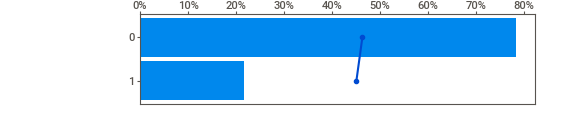
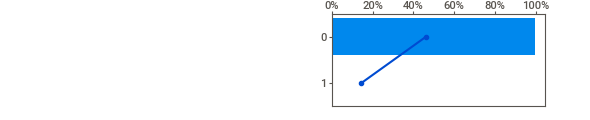
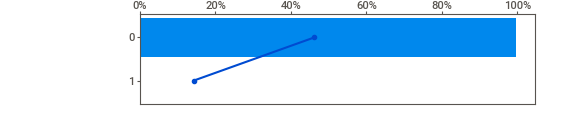
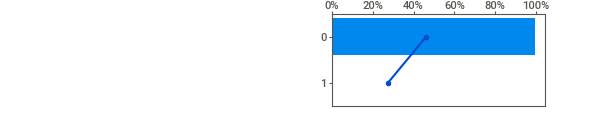
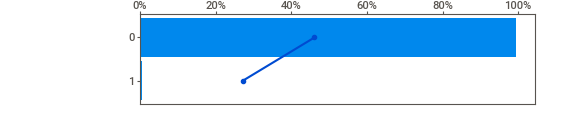
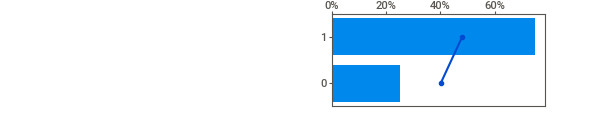
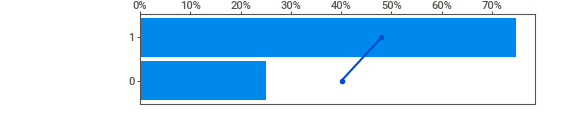
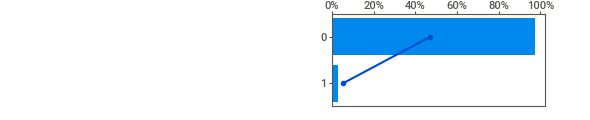
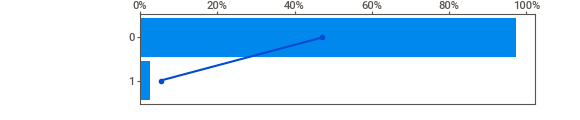
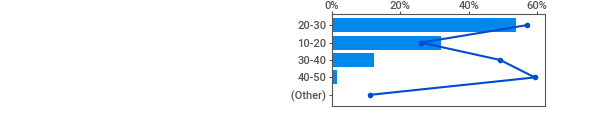
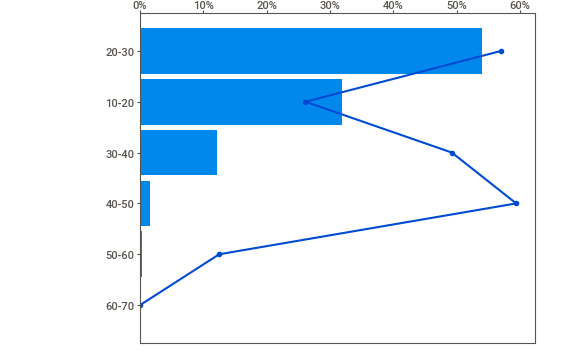
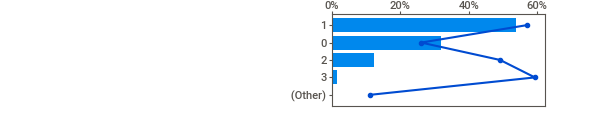
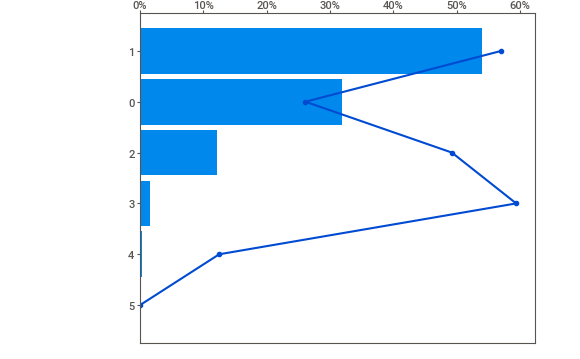
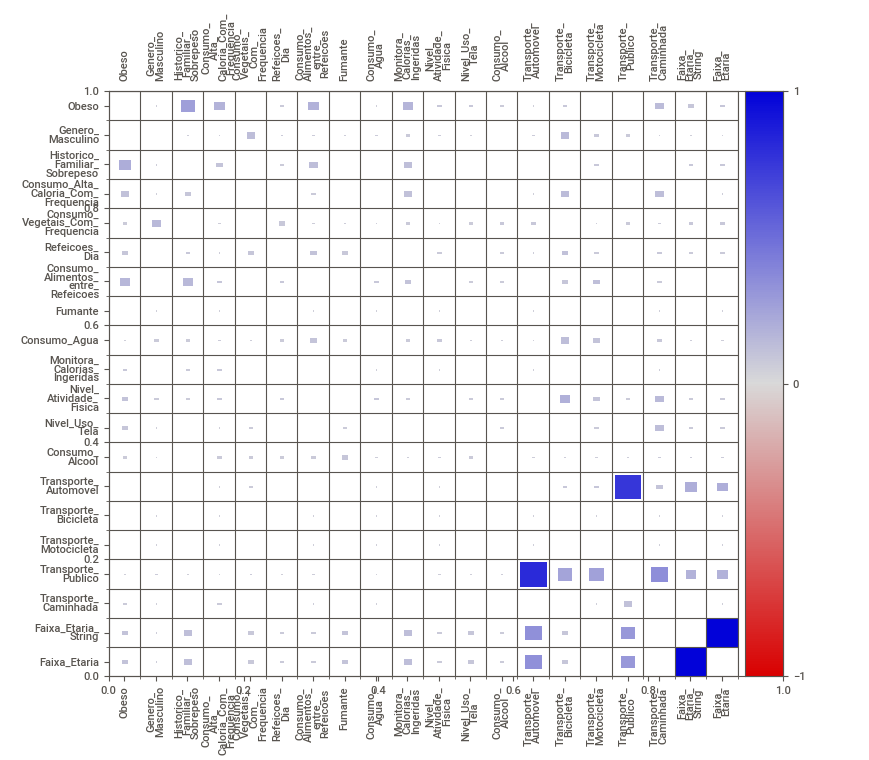
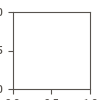

In [138]:
report.show_notebook()

### Treinamento do Modelo - Baseline

In [139]:
X = df_obesidade.drop(columns=['Obeso', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [140]:
# Treinamento do Modelo

model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas do Modelo Baseline

In [141]:
# Predizer valores do conjunto de testes

y_pred = model_baseline.predict(X_test)

In [142]:
# Aavaliando o desempenho do modelo

classification_report_str_baseline = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test,y_pred, average='macro')

print(f'Relatório de Classificação:\n{classification_report_str_baseline}')
print(f'Recall:\n{recall_baseline}')

# Recall = evitar falso negativo

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


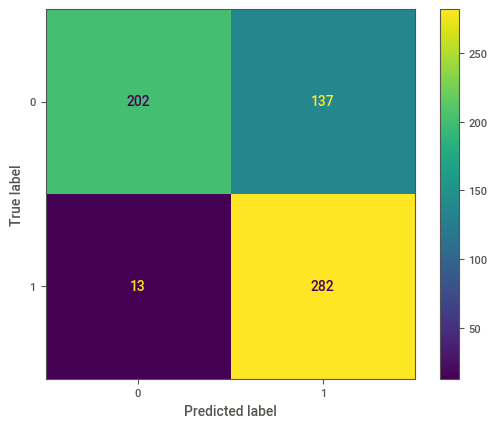

In [143]:
# Mostrar matriz de confusão

cm_baseline = confusion_matrix(y_test, y_pred)
disp_cm_modelo_baseline = ConfusionMatrixDisplay(cm_baseline)
disp_cm_modelo_baseline.plot()

### Treinamento do Modelo - Automated Feature Selection

In [144]:
# Select KBest

selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [145]:
X_train_selected

array([[0, 0, 2, 1, 0],
       [1, 0, 2, 1, 2],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 2],
       [1, 0, 3, 1, 1],
       [1, 0, 1, 0, 1]])

In [146]:
# Features selecionadas

features_selecionadas = X.columns[selector.get_support()]
features_selecionadas

Index(['Historico_Familiar_Sobrepeso', 'Monitora_Calorias_Ingeridas',
       'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela', 'Faixa_Etaria'],
      dtype='object')

In [147]:
# Treinar o modelo com as melhores features

model_kbest = GaussianNB()
model_kbest.fit(X_train_selected, y_train)

GaussianNB()

In [148]:
# Predizendo

y_pred_kbest = model_kbest.predict(X_test_selected)

# Avaliando o desempenho do modelo

classification_report_str_kbest = classification_report(y_test, y_pred_kbest)
recall_kbest = recall_score(y_test,y_pred_kbest, average='macro')

print(f'Relatório de Classificação:\n{classification_report_str_kbest}')
print(f'Recall:\n{recall_kbest}')

# Recall = evitar falso negativo

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       339
           1       0.59      0.96      0.73       295

    accuracy                           0.68       634
   macro avg       0.76      0.70      0.66       634
weighted avg       0.77      0.68      0.66       634

Recall:
0.6950002499875007


### Melhor quantidade de "melhores"features"

In [149]:
def naivebayes_optuna(trial):
  k = trial.suggest_int('k', 1, X_train.shape[1])
  selector = SelectKBest(score_func=chi2, k=k)
  selector.fit(X_train, y_train)
  X_train_selected = selector.transform(X_train)
  X_test_selected = selector.transform(X_test)

  model_kbest_optuna = GaussianNB()
  model_kbest_optuna.fit(X_train_selected, y_train)

  y_pred_kbest_optuna = model_kbest_optuna.predict(X_test_selected)
  recall_optuna = recall_score(y_test, y_pred_kbest_optuna, average='macro')
  return k, recall_optuna

In [150]:
# Rodar estudo

search_space = {'k': range(1, X_train.shape[1] + 1)}
study = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
study.optimize(naivebayes_optuna)



[I 2024-06-27 16:25:07,251] A new study created in memory with name: no-name-739f8522-d426-4495-b668-e5b8e6d123c0
[I 2024-06-27 16:25:07,278] Trial 0 finished with values: [14.0, 0.7727313634318285] and parameters: {'k': 14}. 
[I 2024-06-27 16:25:07,291] Trial 1 finished with values: [10.0, 0.780105994700265] and parameters: {'k': 10}. 
[I 2024-06-27 16:25:07,303] Trial 2 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}. 
[I 2024-06-27 16:25:07,318] Trial 3 finished with values: [12.0, 0.7727313634318285] and parameters: {'k': 12}. 
[I 2024-06-27 16:25:07,330] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}. 
[I 2024-06-27 16:25:07,342] Trial 5 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}. 
[I 2024-06-27 16:25:07,354] Trial 6 finished with values: [1.0, 0.6140192990350483] and parameters: {'k': 1}. 
[I 2024-06-27 16:25:07,721] Trial 7 finished with values: [6.0, 0.7030348482575871] and parameters: {'k

In [151]:
study.best_trials

[FrozenTrial(number=6, state=TrialState.COMPLETE, values=[1.0, 0.6140192990350483], datetime_start=datetime.datetime(2024, 6, 27, 16, 25, 7, 343377), datetime_complete=datetime.datetime(2024, 6, 27, 16, 25, 7, 354376), params={'k': 1}, user_attrs={}, system_attrs={'search_space': {'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}, 'grid_id': 6}, intermediate_values={}, distributions={'k': IntDistribution(high=18, log=False, low=1, step=1)}, trial_id=6, value=None),
 FrozenTrial(number=7, state=TrialState.COMPLETE, values=[6.0, 0.7030348482575871], datetime_start=datetime.datetime(2024, 6, 27, 16, 25, 7, 355372), datetime_complete=datetime.datetime(2024, 6, 27, 16, 25, 7, 721826), params={'k': 6}, user_attrs={}, system_attrs={'search_space': {'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}, 'grid_id': 7}, intermediate_values={}, distributions={'k': IntDistribution(high=18, log=False, low=1, step=1)}, trial_id=7, value=None),
 FrozenTrial(number=

In [152]:
# Avaliar o estudo
trial_with_best_recall = max(study.best_trials, key=lambda x: x.values[1])

# Mostrar melhor recall e menor k

k_best_optuna = trial_with_best_recall.values[0]
recall_best_optuna = trial_with_best_recall.values[1]

print(f'Melhor Recall: {recall_best_optuna}')
print(f'Melhor k: {k_best_optuna}')

Melhor Recall: 0.780105994700265
Melhor k: 8.0


In [153]:
# Mostrar Chart com Trials

fig = optuna.visualization.plot_pareto_front(study)
fig.show()

In [154]:
# Treinar modelo com k=8

selector_k8 = SelectKBest(score_func=chi2, k=8)
selector_k8.fit(X_train, y_train)

X_train_selected = selector_k8.transform(X_train)
X_test_selected = selector_k8.transform(X_test)

# Mostrar as features selecionadas

features_k8_optuna = X.columns[selector_k8.get_support()]
features_k8_optuna

# Treinar modelo

model_naive_bayes_k8 = GaussianNB()
model_naive_bayes_k8.fit(X_train_selected, y_train)

GaussianNB()

In [155]:
features_k8_optuna = X.columns[selector_k8.get_support()]
features_k8_optuna

Index(['Historico_Familiar_Sobrepeso', 'Consumo_Alta_Caloria_Com_Frequencia',
       'Consumo_Alimentos_entre_Refeicoes', 'Monitora_Calorias_Ingeridas',
       'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela', 'Transporte_Caminhada',
       'Faixa_Etaria'],
      dtype='object')

In [156]:
# Salvar modelo

import joblib
joblib.dump(model_naive_bayes_k8, 'naive_bayes_obesidade.pkl')

['naive_bayes_obesidade.pkl']